<a href="https://colab.research.google.com/github/thefarofa/Invest/blob/main/07_AN%C3%81LISE_ESTAT%C3%8DSTICA_DA_QUEDA_DE_12_DO_IBOV_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Configurações Iniciais

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.stats import norm, t

# 2. Análise Estatística do Índice Bovespa

In [4]:
ibov = yf.download("^BVSP")[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [6]:
ibov

,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2023-10-09,115156.000000
2023-10-10,116737.000000
2023-10-11,117051.000000


In [7]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [8]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.14%


In [9]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.19%


In [10]:
ibov[ibov["retorno"] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


**Qual a probabilidade do ibov cair mais que 12% considerando que os retornos seguem uma distribuição normal?**

In [11]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000147%


In [12]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 68116244 dias
Ou uma vez a cada 270302 anos


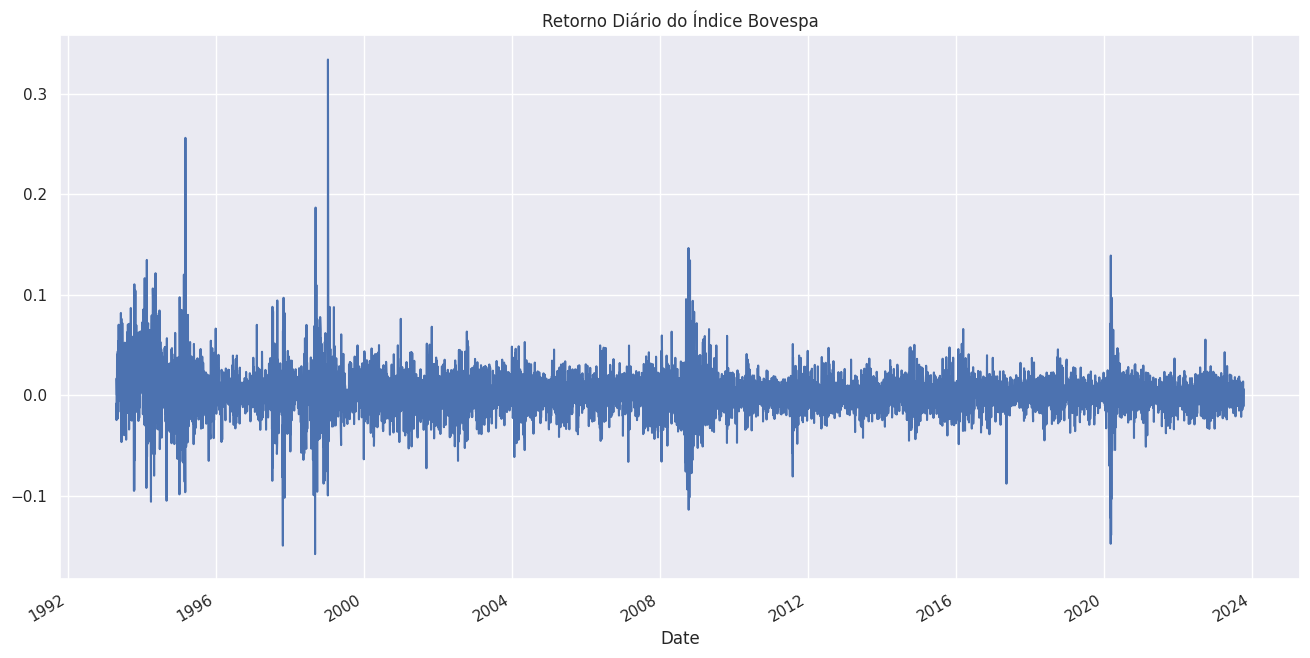

In [13]:
ibov['retorno'].plot(title="Retorno Diário do Índice Bovespa");

In [14]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size,  loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

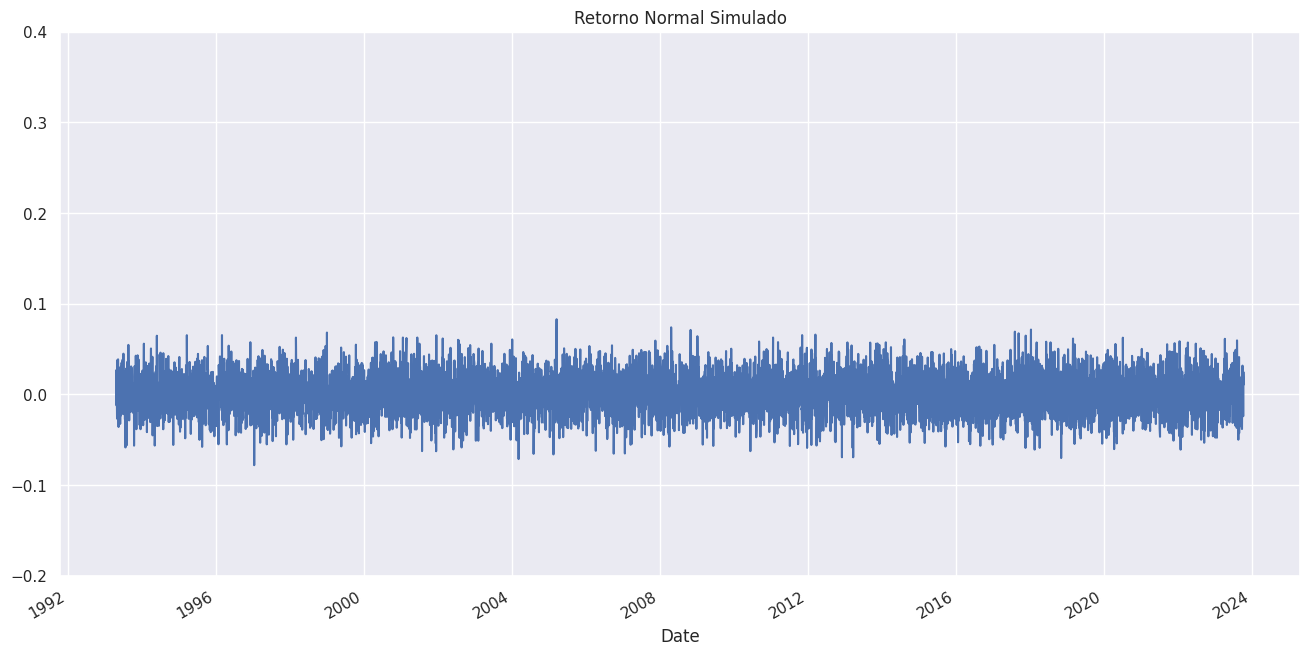

In [15]:
ax = ibov['retorno_teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

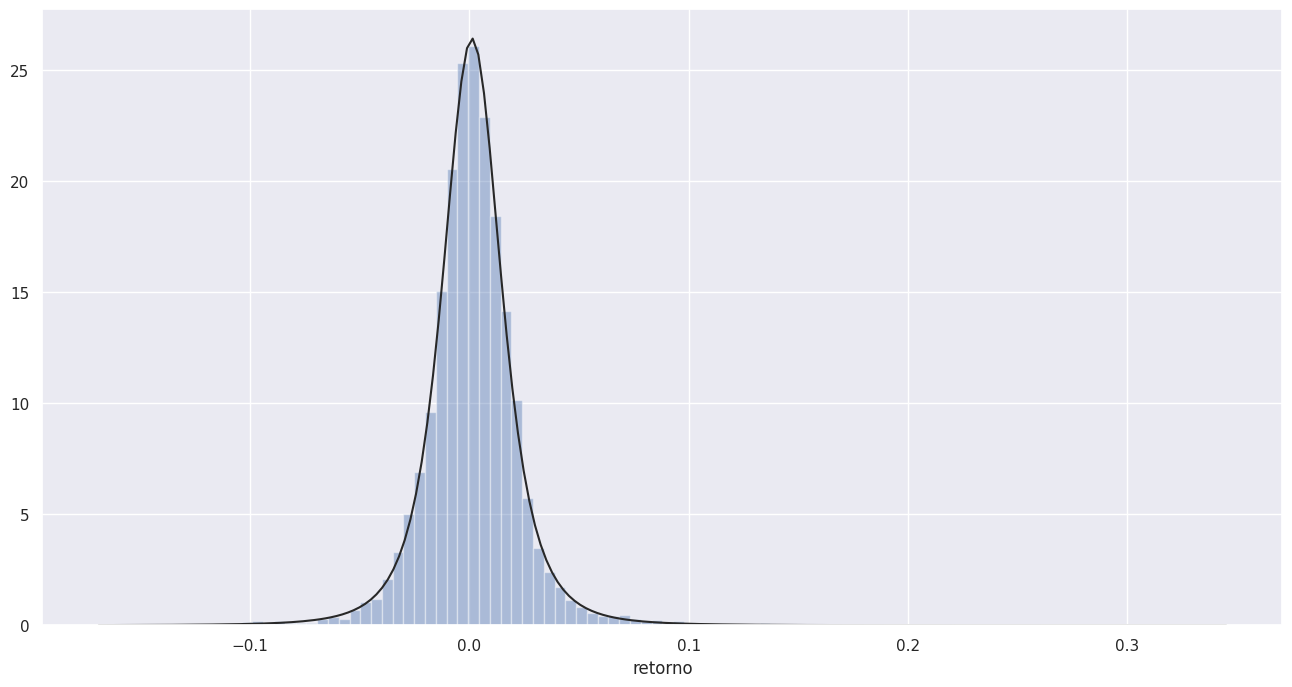

In [16]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=t);

In [17]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.30 
Média=0.0011 
Desvio padrão=0.01400


In [18]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.11191070%


In [19]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 893 dias
Ou uma vez a cada 3 anos


In [20]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 68116244 dias
Ou uma vez a cada 270302 anos


In [22]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].shape[0]
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 1508 dias
